In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
fake_job_postings = pd.read_csv('/content/drive/My Drive/BA476/data/fake_job_postings_cleaned.csv')

In [10]:
X = fake_job_postings[['telecommuting', 'ratio', 'text', 'character_count']]

y = fake_job_postings['fraudulent']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=53)

In [12]:
X_train_num = X_train[['telecommuting', 'ratio', 'character_count']]
X_test_num = X_test[['telecommuting', 'ratio', 'character_count']]
print(X_train_num)

       telecommuting  ratio  character_count
10357              0   0.00              919
1905               1   0.02             3000
7707               0   0.00             5683
940                0   0.02              962
8467               0   0.00              654
...              ...    ...              ...
3261               0   0.00             2602
6565               0   0.00             2477
2933               0   0.00             4610
8989               0   0.00             3980
7705               0   0.00             4704

[7097 rows x 3 columns]


In [13]:
count_vectorizer = CountVectorizer( stop_words='english')
count_train = count_vectorizer.fit_transform(X_train.text.values)
count_test = count_vectorizer.transform(X_test.text.values)
print(count_train)
print(count_vectorizer.get_feature_names()[15188])
print(count_vectorizer.get_feature_names()[1])
print(count_vectorizer.get_feature_names()[46954])

  (0, 45965)	11
  (0, 22552)	4
  (0, 10152)	3
  (0, 25345)	2
  (0, 23195)	2
  (0, 29265)	3
  (0, 19112)	2
  (0, 7907)	2
  (0, 48197)	1
  (0, 39105)	1
  (0, 2751)	1
  (0, 9611)	1
  (0, 2323)	1
  (0, 20680)	1
  (0, 16852)	1
  (0, 938)	1
  (0, 27539)	1
  (0, 29924)	1
  (0, 21265)	1
  (0, 6787)	1
  (0, 34125)	1
  (0, 31128)	1
  (0, 16767)	1
  (0, 39914)	1
  (0, 34471)	1
  :	:
  (7096, 42578)	1
  (7096, 38901)	1
  (7096, 17250)	1
  (7096, 11096)	2
  (7096, 29907)	1
  (7096, 30989)	1
  (7096, 13472)	2
  (7096, 47426)	2
  (7096, 46781)	1
  (7096, 40688)	5
  (7096, 42594)	1
  (7096, 19397)	1
  (7096, 33363)	1
  (7096, 40686)	1
  (7096, 18923)	1
  (7096, 10360)	2
  (7096, 31060)	1
  (7096, 23422)	1
  (7096, 18893)	1
  (7096, 35791)	1
  (7096, 6584)	1
  (7096, 29955)	1
  (7096, 37695)	1
  (7096, 15810)	1
  (7096, 4505)	1
engaged
000
typist


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split

nb_classifier = MultinomialNB()
#print(count_train)
nb_classifier.fit(count_train, y_train)
pred = nb_classifier.predict(count_test)
metrics.accuracy_score(y_test, pred)
cv_scores = cross_val_score(nb_classifier, count_train, y_train, cv = 10)
print(cv_scores.mean())
#print(count_vectorizer.inverse_transform(count_train[0]))


0.959842666719641


In [15]:
# nb_classifier_num = MultinomialNB()
# nb_classifier_num.fit(X_train_num, y_train)
# pred_nb_num = nb_classifier.predict(X_test_num)
# metrics.accuracy_score(y_test, pred_nb_num)

In [16]:
from sklearn.linear_model import SGDClassifier

# SDG on text features
clf_log = SGDClassifier(loss='log',penalty="l2").fit(count_train, y_train)
pred_log = clf_log.predict(count_test)
metrics.accuracy_score(y_test, pred_log)

cv_scores = cross_val_score(clf_log, count_train, y_train, cv = 10)
print(cv_scores.mean())

0.9759043683823677


In [17]:
# SDG on numerical data 
clf_num = SGDClassifier(loss='log',penalty="l2").fit(X_train_num, y_train)
pred_num = clf_num.predict(X_test_num)
metrics.accuracy_score(y_test, pred_num)
print(clf_num.coef_)

[[ 27.69730765 655.91507448  -5.61828292]]


In [18]:
# SDG based off both numerical and textual features 

prediction_array = []

for i, j in zip(pred_num, pred_log):
    if i == 0 and j == 0:
        prediction_array.append(0)
    else:
        prediction_array.append(1)
print(metrics.accuracy_score(y_test, prediction_array))

0.9745423340961098


In [19]:
from sklearn.metrics import f1_score
print(f1_score(y_test, pred))
print(f1_score(y_test, prediction_array))



0.7435897435897436
0.7925407925407926


In [20]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, pred_log)
nb_matrix = confusion_matrix(y_test, pred)

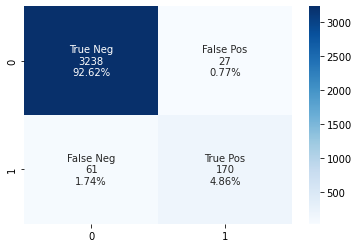

In [21]:
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
                      
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [22]:
len(y_test[y_test == 0]), len(y_test[y_test == 1])

(3265, 231)

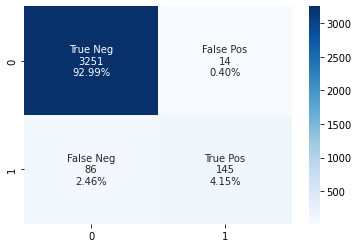

In [23]:
group_counts = ["{0:0.0f}".format(value) for value in
                nb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      nb_matrix.flatten()/np.sum(nb_matrix)]
                      
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nb_matrix, annot=labels, fmt='', cmap='Blues');

In [24]:

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)

# Logistic regression on textual
# fit 
logreg = LogisticRegression()
scaler.fit_transform(count_train)
logreg.fit(count_train, y_train)
cv_scores = cross_val_score(logreg, count_train, y_train, cv = 10)
print(cv_scores.mean())
print(logreg.coef_)
# predict
scaler.fit_transform(count_test)
y_pred_lr = logreg.predict(count_test)
print(metrics.accuracy_score(y_test, y_pred_lr))
print(f1_score(y_test, y_pred_lr))
lg_matrix = confusion_matrix(y_test, y_pred_lr)


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

0.9791449969208765
[[-1.44161828e-01  6.27126234e-01 -6.51705274e-02 ... -1.43314120e-05
  -1.04561190e-05 -6.93930152e-07]]
0.9776887871853547
0.8169014084507042


In [25]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train_num).fit()
print(model.summary())

dropped_tele = X_train_num[['ratio','character_count']]
model = sm.Logit(y_train, X_train_num).fit()
print(model.summary())

print(np.asarray(count_train))

import statsmodels.api as sm
model = sm.Logit(y_train, count_train.astype(int)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.258066
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:             fraudulent   No. Observations:                 7097
Model:                          Logit   Df Residuals:                     7094
Method:                           MLE   Df Model:                            2
Date:                Tue, 06 Dec 2022   Pseudo R-squ.:                -0.02155
Time:                        21:34:29   Log-Likelihood:                -1831.5
converged:                       True   LL-Null:                       -1792.9
Covariance Type:            nonrobust   LLR p-value:                     1.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
telecommuting       0.1272      0.188      0.676      0.499      -0.241       0.496
ratio         

ValueError: ignored

In [ ]:
from sklearn.model_selection import cross_val_score


# Logistic regression on numeric
dropped_tele = X_train_num[['ratio','character_count']]
dropped_tele_test = X_test_num[['ratio','character_count']]
logreg = LogisticRegression()
scaler.fit_transform(dropped_tele)
logreg.fit(dropped_tele, y_train)
cv_scores = cross_val_score(logreg, dropped_tele, y_train, cv = 5)
# predict
scaler.fit_transform(dropped_tele_test)
y_pred_lr_nm = logreg.predict(dropped_tele_test)
print(metrics.accuracy_score(y_test, y_pred_lr_nm))
print(f1_score(y_test, y_pred_lr_nm))
print(logreg.coef_)



In [ ]:
print(cv_scores.mean())

In [ ]:
# Logistic regression based off both numerical and textual features 

prediction_array_LR = []

for i, j in zip(y_pred_lr_nm, y_pred_lr):
    if i == 0 and j == 0:
        prediction_array_LR.append(0)
    else:
        prediction_array_LR.append(1)
print(metrics.accuracy_score(y_test, prediction_array_LR))
print(f1_score(y_test, prediction_array_LR))

In [ ]:
group_counts = ["{0:0.0f}".format(value) for value in
                lg_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      lg_matrix.flatten()/np.sum(lg_matrix)]
                      
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lg_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
from collections import Counter
from matplotlib import pyplot
from numpy import where

counter = Counter(y_train)
print(counter)





In [29]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=2).fit(count_train, y_train)   
y_test_predictions = model.predict(count_test)
print(y_test_predictions)
y_test_predictions = [0 if x <= 0.5 else 1 for x in y_test_predictions]

#print("RMSE on testing set = ", mean_squared_error(y_test, y_test_predictions.round(0)))
print(model.score(count_train, y_train))
print(model.score(count_test, y_test))
print(y_test)
print(y_test_predictions)
print(metrics.accuracy_score(y_test, y_test_predictions))
print(metrics.f1_score(y_test, prediction_array))

[0. 0. 0. ... 0. 0. 0.]
0.8335560575152626
0.2792134868704549
2406     0
1223     0
1100     0
3092     0
440      0
        ..
9365     0
6769     0
9012     0
5704     0
10454    0
Name: fraudulent, Length: 3496, dtype: int64
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, prediction_array)
group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues');

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE()
count_train, y_train = oversample.fit_resample(count_train, y_train)
counter = Counter(y_train)
SMdt = pd.DataFrame(y_train)
print(SMdt)
#sns.countplot(x='fraudulent', data=fake_job_postings_US, palette = ['#00008B','#ADD8E6']);
#SGD with SMOTE
sns.countplot(x='fraudulent', data=SMdt, palette = ['#00008B','#ADD8E6']);
clf2_log = SGDClassifier(loss='log',penalty="l2").fit(count_train, y_train)
pred2_log = clf2_log.predict(count_test)
print(metrics.accuracy_score(y_test, pred2_log))
print(f1_score(y_test, pred2_log))

In [ ]:
#Log Reg with SMOTE
logreg.fit(count_train, y_train)
y_pred_lr_sm = logreg.predict(count_test)
print(metrics.accuracy_score(y_test, y_pred_lr_sm))
print(f1_score(y_test, y_pred_lr_sm))

In [ ]:
# Naive bayes with SMOTE

nb_classifier.fit(count_train, y_train)
pred_sm = nb_classifier.predict(count_test)
print(metrics.accuracy_score(y_test, pred_sm))
print(f1_score(y_test, pred_sm))